<a href="https://colab.research.google.com/github/Mahadevkharmate/DeepLearning_Hub/blob/main/experiments/ANN/03_Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Graduate Admission Prediction using ANN*
* Regression Problem statement
* Predicting admission from important parameters

## About Dataset
### Context
  * This dataset is created for prediction of Graduate Admissions from an Indian perspective.
###Content
  * The dataset contains several parameters which are considered important during the application for Masters Programs.

The parameters included are :

1.  GRE Scores ( out of 340 )
2.  TOEFL Scores ( out of 120 )
3.  University Rating ( out of 5 )
4.  Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5.  Undergraduate GPA ( out of 10 )
6.  Research Experience ( either 0 or 1 )
7.  Chance of Admit ( ranging from 0 to 1 )

### Inspiration
* This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url ="https://raw.githubusercontent.com/Mahadevkharmate/DeepLearning_Hub/refs/heads/main/datasets/Admission_Predict.csv"
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.drop(columns =['Serial No.'],inplace =True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
from sklearn.model_selection import train_test_split
X= df.drop(columns =['Chance of Admit '])
y= df['Chance of Admit ']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =42)


In [14]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled[0]

array([0.64      , 0.64285714, 0.5       , 0.625     , 0.375     ,
       0.59935897, 1.        ])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input

In [31]:
model = Sequential()

model.add(Input(shape=(7,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])


In [35]:
history = model.fit(X_train_scaled,y_train,epochs=100,verbose=1,batch_size=40,validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.0000e+00 - loss: 0.1541 - val_accuracy: 0.0000e+00 - val_loss: 0.0295
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0359 - val_accuracy: 0.0000e+00 - val_loss: 0.0300
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0214 - val_accuracy: 0.0000e+00 - val_loss: 0.0132
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0149 - val_accuracy: 0.0000e+00 - val_loss: 0.0084
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0101 - val_accuracy: 0.0000e+00 - val_loss: 0.0066
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0087 - val_accuracy: 0.0000e+00 - val_loss: 0.0059
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0070 - val_accuracy: 0.0000e+00 - val_loss: 0.0045
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 

In [36]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [37]:
y_pred[1:5]

array([[0.70272744],
       [0.94744563],
       [0.8382745 ],
       [0.5966268 ]], dtype=float32)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.807955343950258

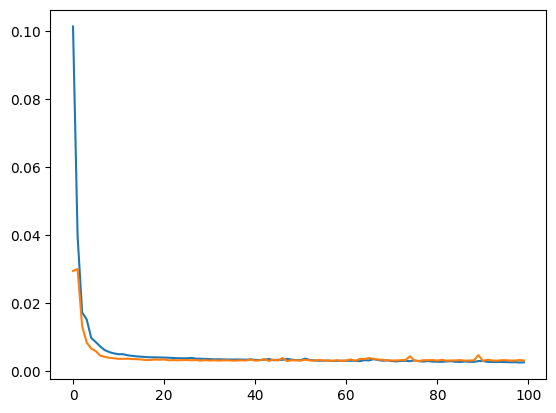

In [40]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])